In [2]:
import pandas as pd

In [3]:
df_baza_filmow = pd.read_csv('tmdb_movies.csv')
df_baza_gatunkow = pd.read_csv('tmdb_genres.csv')

In [5]:
df_baza_filmow.head(1)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0


### Zad 1

In [16]:
#zad1: Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów
trzeci_kwartyl = df_baza_filmow['vote_count'].quantile(0.75)
powyzej_trzeciego_kwartyla = df_baza_filmow[df_baza_filmow['vote_count'] > trzeci_kwartyl]
wynik = powyzej_trzeciego_kwartyla.sort_values(by='vote_average', ascending=False).head(10)
wynik_titles = wynik[['title', 'vote_average', 'vote_count']]
wynik_titles.reset_index(drop=True, inplace=True)
wynik_titles

,title,vote_average,vote_count
0,The Shawshank Redemption,8.5,8205
1,The Godfather,8.4,5893
2,The Godfather: Part II,8.3,3338
3,Pulp Fiction,8.3,8428
4,Whiplash,8.3,4254
5,Schindler's List,8.3,4329
6,Fight Club,8.3,9413
7,Spirited Away,8.3,3840
8,Psycho,8.2,2320
9,One Flew Over the Cuckoo's Nest,8.2,2919


### Zad 2

In [17]:
#zad2: Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku 
#dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). 
#Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. 
#Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi

In [21]:
df_baza_filmow['release_date'].dtype #sprawdzenie typu danych => dt czy str

dtype('O')

In [35]:
df_baza_filmow['year'] = df_baza_filmow['release_date'].str[:4]
df_baza_filmow['year'].unique()

array(['2009', '2007', '2015', '2012', '2010', '2016', '2006', '2008',
       '2013', '2011', '2014', '2005', '1997', '2004', '1999', '1995',
       '2003', '2001', '2002', '1998', '2000', '1990', '1991', '1994',
       '1996', '1982', '1993', '1979', '1992', '1989', '1984', '1988',
       '1978', '1962', '1980', '1972', '1981', '1968', '1985', '1940',
       '1963', '1987', '1986', '1973', '1983', '1976', '1977', '1970',
       '1971', '1969', '1960', '1965', '1964', '1927', '1974', '1937',
       '1975', '1967', '1951', '1961', '1946', '1953', '1954', '1959',
       '1932', '1947', '1956', '1945', '1952', '1930', '1966', '1939',
       '1950', '1948', '1958', '1957', '1944', '1938', '1949', '1936',
       '2017', '1941', '1955', '1942', '1929', '1935', nan, '1933',
       '1916', '1934', '1925'], dtype=object)

In [39]:
print(df_baza_filmow['release_date'].isnull().mean())

0.0


In [37]:
df_baza_filmow.dropna(subset=['year'], inplace=True)

In [40]:
df_film_2010_2026 = df_baza_filmow[(df_baza_filmow['year'].astype(int) >= 2010) & (df_baza_filmow['year'].astype(int) <= 2016)]
df_film_2010_2026.head(1)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,year
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,2015


In [42]:
import matplotlib.pyplot as plt

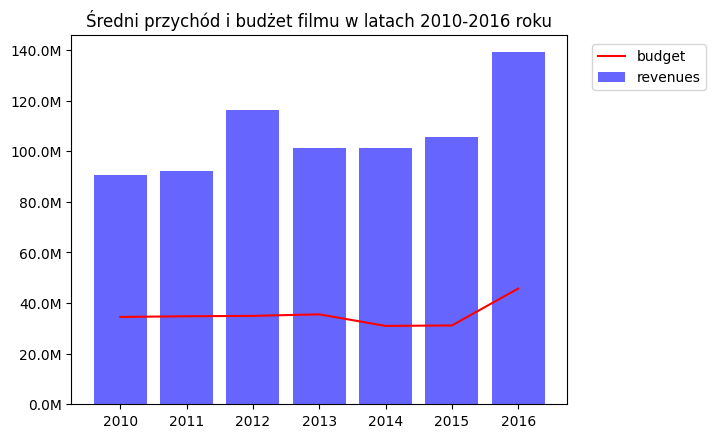

In [56]:
revenues = df_film_2010_2026.groupby('year')['revenue'].mean()
budgets = df_film_2010_2026.groupby('year')['budget'].mean()
years = revenues.index # konieczne sortowanie

# Tworzenie wykresu
fig, axes = plt.subplots()
axes.bar(years, revenues, color='blue', alpha=0.6, label='revenues')
axes.plot(years, budgets, color='red', label='budget')

# Dodanie tytułu
axes.set_title('Średni przychód i budżet filmu w latach 2010-2016 roku')

# Formatowanie osi y
def million(x, pos):
        return '{:2.1f}M'.format(x*1e-6)
    
formatter = plt.FuncFormatter(million)
axes.yaxis.set_major_formatter(formatter)

# Dodanie legendy w określonej pozycji
axes.legend(loc=(1.05,0.85))

plt.show()

### Zad 3

In [ ]:
#zad3: Baza filmów zawiera kolumnę z id gatunku (genre_id). 
#Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [58]:
df_baza_gatunkow.head(1)

,Unnamed: 0,genres
0,28.0,Action


In [62]:
df_baza_gatunkow = df_baza_gatunkow.rename(columns={'Unnamed: 0': 'genre_id'})

In [63]:
df_baza_gatunkow.head(1)

,genre_id,genres
0,28.0,Action


In [70]:
df_baza_filmow = pd.merge(df_baza_filmow,df_baza_gatunkow,how='left',on='genre_id')

In [71]:
df_baza_filmow.head(1)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,year,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,2009,Action


### Zad 4

In [ ]:
#zad4: Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [75]:
count_genres=df_baza_filmow['genres'].value_counts() #posortuje od największej do najmniejszej liczby wystąpień
count_genres.head(1)

genres
Drama    1207
Name: count, dtype: int64

### Zad 5

In [ ]:
#zad5: Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [76]:
runtime_genres = df_baza_filmow.groupby('genres')['runtime'].mean().sort_values(ascending=False)
runtime_genres.head(1)

genres
History    133.96
Name: runtime, dtype: float64

### Zad 6

In [ ]:
#zad6: Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

In [77]:
df_film_hist = df_baza_filmow[df_baza_filmow['genres'] == 'History']

<Axes: >

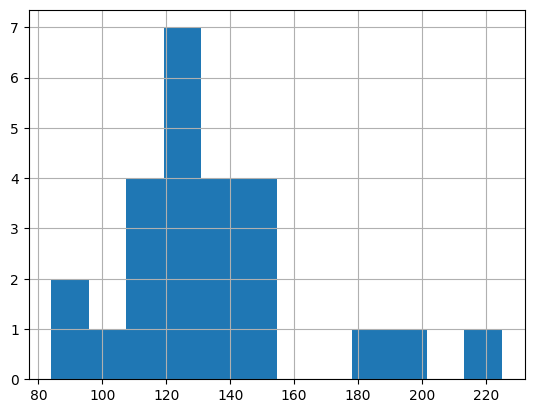

In [85]:
df_film_hist['runtime'].hist(bins=12)